# Explorative Data Analysis
### Before Preprocessing


## Meta Information
- Structured data - computer resources 
Similiar to docker stats command: https://docker-py.readthedocs.io/en/stable/containers.html#docker.models.containers.Container.stats, https://docs.docker.com/config/containers/runmetrics/
    time series: datetime format 
    cpu usage:
    memory usage: 
    network received: rx (Received) bytes 
    network send: tx (Transmit) bytes 
    storage read:
    storage written:
- Unsupervised Problem - Unsupervised means no labels and a model is trained on the complete data and assumes that the majority of the instances are normal.
- was sind das für Größen, Skalierbarkeit ? verschieddene größen 
- fruterh ideas : time series data lags, autocorrelation 


Does it make sense to look at each container seperatly?

 eth0 - Network Interface 
 REMEBER: Anzahl an Einträgen von Docker Container ist recording lenth -> hence 45 sec.

In [196]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
from datetime import datetime, time
import matplotlib.dates as mdates

In [139]:
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/train.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/test.pkl")

In [140]:
train.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,container_name,dates,times
timestamp,,,,,,,,,
2021-09-09 23:21:47.309,0.111557,17649664,7532,18490,0,0,abundant_buck_7911,2021-09-09,23:21:47.309000
2021-09-09 23:21:48.319,0.123430,19746816,5158,11520,0,0,abundant_buck_7911,2021-09-09,23:21:48.319000
2021-09-09 23:21:49.336,0.121031,21782528,2818,11246,0,0,abundant_buck_7911,2021-09-09,23:21:49.336000
2021-09-09 23:21:50.345,0.145855,25518080,4402,13775,0,0,abundant_buck_7911,2021-09-09,23:21:50.345000
2021-09-09 23:21:51.364,0.343448,32534528,9146,36294,0,0,abundant_buck_7911,2021-09-09,23:21:51.364000


In [141]:
test.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,container_name,dates,times
timestamp,,,,,,,,,
2021-12-21 16:29:19.790,0.000556,13762560,872,0,0,0,abundant_knuth_3979,2021-12-21,16:29:19.790000
2021-12-21 16:29:20.795,0.000329,13762560,422,0,0,0,abundant_knuth_3979,2021-12-21,16:29:20.795000
2021-12-21 16:29:21.802,0.121941,16089088,4671,13851,0,0,abundant_knuth_3979,2021-12-21,16:29:21.802000
2021-12-21 16:29:22.808,0.021975,17104896,221,0,0,0,abundant_knuth_3979,2021-12-21,16:29:22.808000
2021-12-21 16:29:23.815,0.059089,19099648,0,0,0,0,abundant_knuth_3979,2021-12-21,16:29:23.815000


In [142]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9564 entries, 2021-09-09 23:21:47.309000 to 2021-09-15 12:32:22.769000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpu_usage         9564 non-null   float64
 1   memory_usage      9564 non-null   int64  
 2   network_received  9564 non-null   int64  
 3   network_send      9564 non-null   int64  
 4   storage_read      9564 non-null   int64  
 5   storage_written   9564 non-null   int64  
 6   container_name    9564 non-null   object 
 7   dates             9564 non-null   object 
 8   times             9564 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 747.2+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39927 entries, 2021-12-21 16:29:19.790000 to 2021-09-09 18:17:44.974000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpu_usa

In [143]:
# Check for missing values
print("#######################")
print("Train Data:")
print("#######################")
print(train.isnull().sum())
print("#######################")
print("Test Data")
print("#######################")
print(test.isnull().sum())

#######################
Train Data:
#######################
cpu_usage           0
memory_usage        0
network_received    0
network_send        0
storage_read        0
storage_written     0
container_name      0
dates               0
times               0
dtype: int64
#######################
Test Data
#######################
cpu_usage           0
memory_usage        0
network_received    0
network_send        0
storage_read        0
storage_written     0
container_name      0
dates               0
times               0
dtype: int64


In [113]:
print("#######################")
print("Train Data:")
print("#######################")
print(train.shape)
print("#######################")
print("Test Data")
print("#######################")
print(test.shape)

#######################
Train Data:
#######################
(9564, 9)
#######################
Test Data
#######################
(39927, 9)


In [114]:
# Check for the amount of zeros 
print("#######################")
print("Train Data:")
print("#######################")
columns = train.columns.tolist()
print((train[columns]== 0).sum())
print("#######################")
print("Test Data")
print("#######################")
columns_test = test.columns.tolist()
print((test[columns]== 0).sum())

#######################
Train Data:
#######################
cpu_usage              0
memory_usage           0
network_received     531
network_send         584
storage_read        9556
storage_written     9332
container_name         0
dates                  0
times                  0
dtype: int64
#######################
Test Data
#######################
cpu_usage               0
memory_usage            0
network_received     2387
network_send         3017
storage_read        39774
storage_written     38818
container_name          0
dates                   0
times                   0
dtype: int64


In [144]:
train.describe() # Only positive values

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,9564.000000,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000
mean,0.141092,3.586510e+07,4084.739753,16489.362087,67.238812,154.606441
std,0.107538,8.686077e+06,3197.226831,29075.417379,4265.001791,1107.688249
min,0.000277,1.531904e+07,0.000000,0.000000,0.000000,0.000000
25%,0.076871,3.189555e+07,2091.000000,6932.000000,0.000000,0.000000
50%,0.123746,3.720806e+07,3485.000000,11631.000000,0.000000,0.000000
75%,0.181755,4.089446e+07,5227.000000,18469.000000,0.000000,0.000000
max,1.146535,6.668288e+07,28425.000000,354543.000000,356352.000000,20480.000000


In [145]:
test.describe()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written
count,39927.000000,3.992700e+04,39927.000000,39927.000000,3.992700e+04,3.992700e+04
mean,0.141173,3.568852e+07,4121.127733,16244.512260,3.506431e+02,2.255893e+02
std,0.111868,8.876811e+06,3479.540021,29279.070981,1.623316e+04,1.177772e+04
min,0.000129,1.361920e+07,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.071625,3.198566e+07,2090.000000,5374.500000,0.000000e+00,0.000000e+00
50%,0.125114,3.719578e+07,3485.000000,11593.000000,0.000000e+00,0.000000e+00
75%,0.184521,4.099277e+07,5395.000000,18557.500000,0.000000e+00,0.000000e+00
max,2.314982,7.683277e+07,35819.000000,614079.000000,1.503232e+06,2.342912e+06


In [19]:
# check variances 
train.var()

/var/folders/w0/j_glm66x74z4bc3n2z6xd92r0000gn/T/ipykernel_18014/1790325689.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.var()


cpu_usage           1.156453e-02
memory_usage        7.544793e+13
network_received    1.022226e+07
network_send        8.453799e+08
storage_read        1.819024e+07
storage_written     1.226973e+06
dtype: float64

## Distribution for each Feature

### CPU-Usage

CPU-Usage and Memory Consumption are propably the best indicators

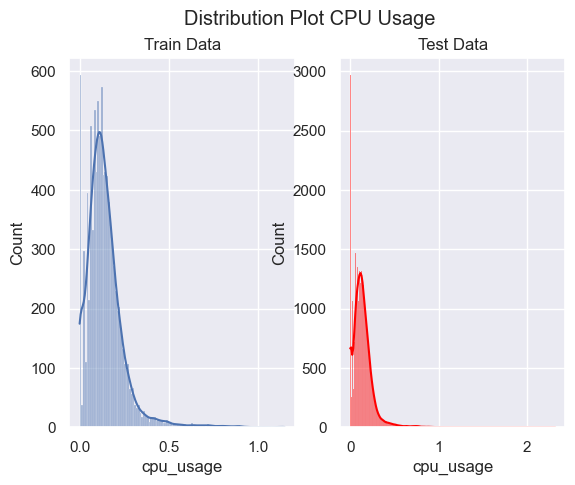

In [146]:
fig, axes = plt.subplots(1,2)
sns.set()
fig.suptitle('Distribution Plot CPU Usage')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
sns.histplot(train.cpu_usage, kde=True, ax=axes[0])# left skewed
sns.histplot(test.cpu_usage, kde=True, ax=axes[1], color='red') # left skewed
plt.show()

In [147]:
print("#############################")
print("Train Data:")
print("#############################")
print("Skewness: %f" % train['cpu_usage'].skew())
print("Kurtosis: %f" % train['cpu_usage'].kurt())
print("#############################")
print("Test Data:")
print("#############################")
print("Skewness: %f" % test['cpu_usage'].skew())
print("Kurtosis: %f" % test['cpu_usage'].kurt())

#############################
Train Data:
#############################
Skewness: 2.476019
Kurtosis: 11.709240
#############################
Test Data:
#############################
Skewness: 2.678905
Kurtosis: 16.378067


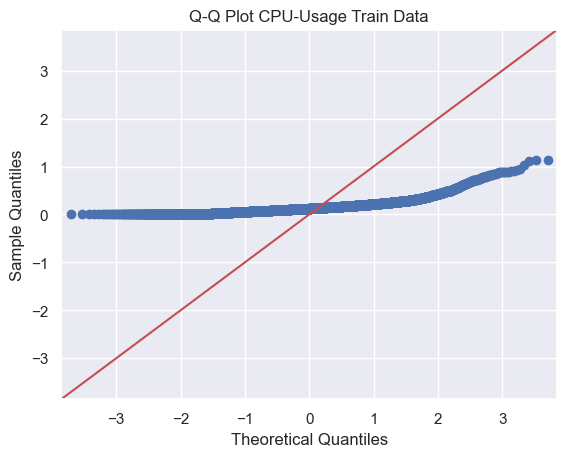

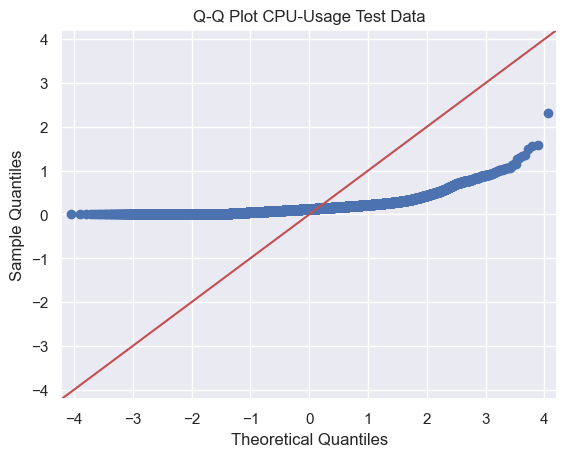

In [148]:
# Q-Q Plot 
fig = sm.qqplot(train.cpu_usage, line='45') # cpu usage does not follow normal behaviour
plt.title("Q-Q Plot CPU-Usage Train Data")
plt.show()
# Q-Q Plot 
fig = sm.qqplot(test.cpu_usage, line='45') # cpu usage does follow normal behaviour
plt.title("Q-Q Plot CPU-Usage Test Data")
plt.show()

### Memory Consumption

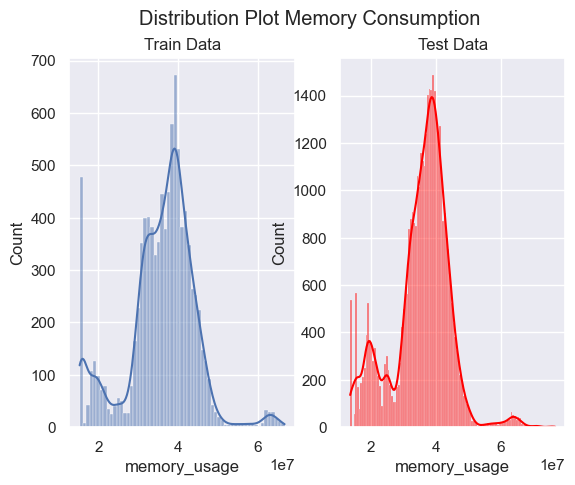

In [149]:
fig, axes = plt.subplots(1,2)
sns.set()
fig.suptitle('Distribution Plot Memory Consumption')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
sns.histplot(train['memory_usage'], kde=True, ax=axes[0])# left skewed
sns.histplot(test['memory_usage'], kde=True, ax=axes[1], color='red') # left skewed
plt.show()

<AxesSubplot:>

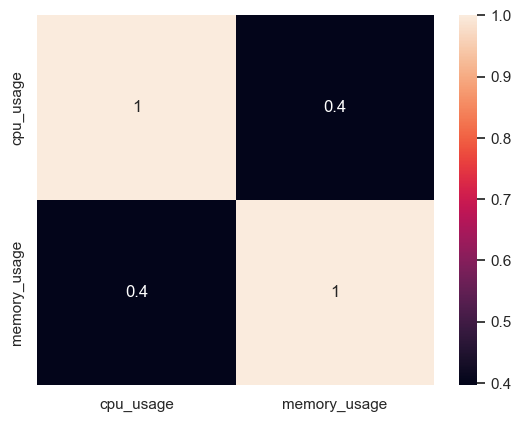

In [150]:
# check correlation between cpu and memory usage
corr = train[['cpu_usage','memory_usage']].corr()
sns.heatmap(corr, annot=True)

## Network send and Network received

center close to/ around zero with huge outliers --> How to handle? Try different Transformations

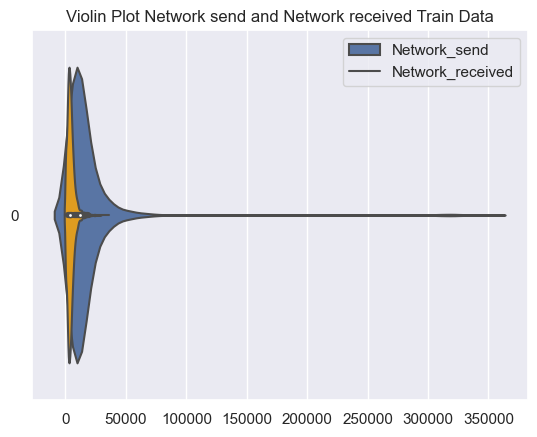

In [151]:
f, ax = plt.subplots(1,1)
plt.title("Violin Plot Network send and Network received Train Data")
sns.violinplot(train.network_send, orient='h', ax=ax)
sns.violinplot(train.network_received, orient='h', color="orange", ax=ax)
plt.legend(labels=["Network_send", "Network_received"])
plt.show()

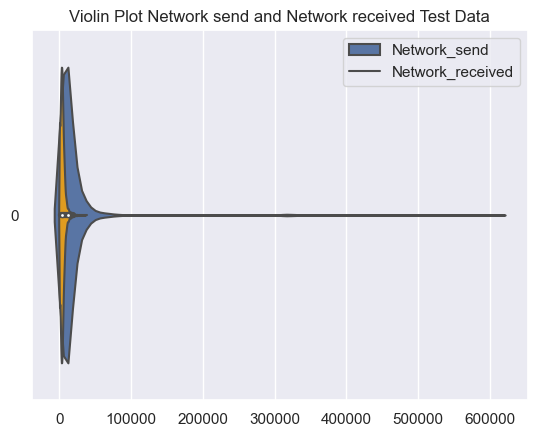

In [152]:
f, ax = plt.subplots(1,1)
plt.title("Violin Plot Network send and Network received Test Data")
sns.violinplot(test.network_send, orient='h', ax=ax)
sns.violinplot(test.network_received, orient='h', color="orange", ax=ax)
plt.legend(labels=["Network_send", "Network_received"])
plt.show()

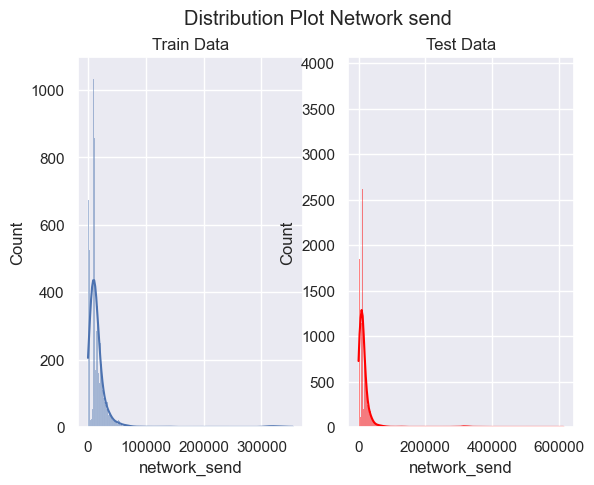

In [153]:
fig, axes = plt.subplots(1,2)
sns.set()
fig.suptitle('Distribution Plot Network send')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
sns.histplot(train['network_send'], kde=True, ax=axes[0])# left skewed
sns.histplot(test['network_send'], kde=True, ax=axes[1], color='red') # left skewed
plt.show()

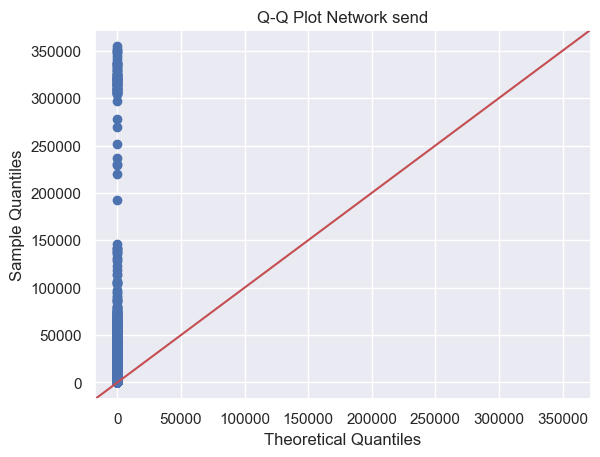

In [154]:
# Q-Q Plot 
fig = sm.qqplot(train.network_send, line='45') # Network send does not follow normal behaviour
plt.title("Q-Q Plot Network send")
plt.show()

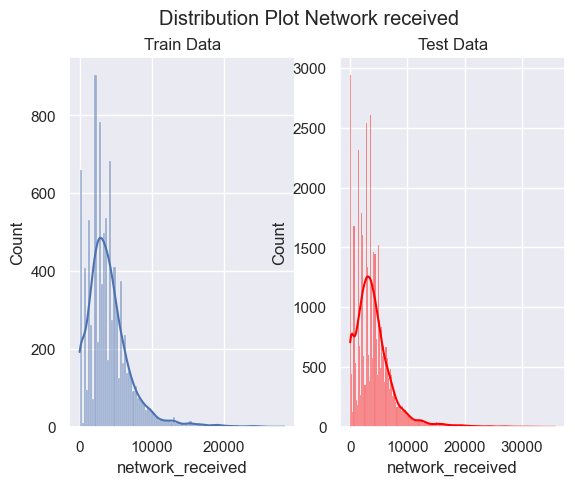

In [155]:
fig, axes = plt.subplots(1,2)
sns.set()
fig.suptitle('Distribution Plot Network received')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
sns.histplot(train['network_received'], kde=True, ax=axes[0])# left skewed
sns.histplot(test['network_received'], kde=True, ax=axes[1], color='red') # left skewed
plt.show()

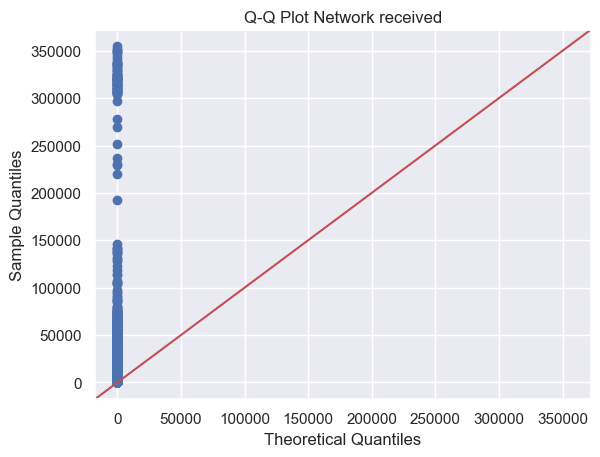

In [156]:
# Q-Q Plot 
fig = sm.qqplot(train.network_send, line='45') # Cpu_Usage follows normal behaviour
plt.title("Q-Q Plot Network received")
plt.show()

<AxesSubplot:>

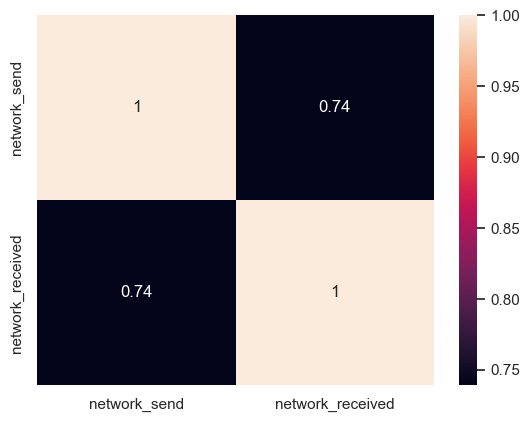

In [157]:
# check correlation between both
corr = train[['network_send','network_received']].corr()
sns.heatmap(corr, annot=True)

## Storage read and Storage written

Same behaviour as Network send and Network received, center around zero but huge outliers


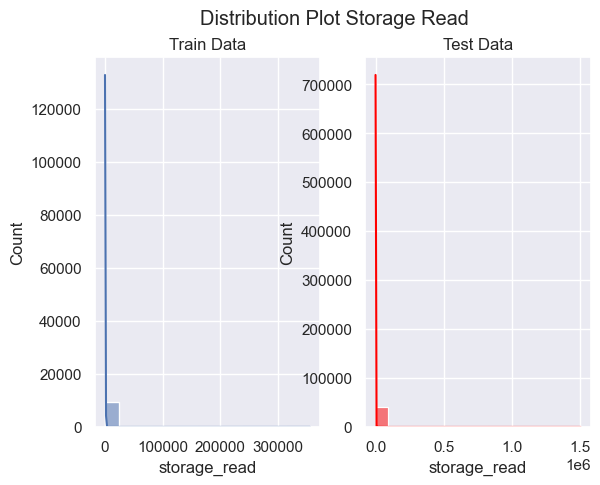

In [158]:
fig, axes = plt.subplots(1,2)
sns.set()
fig.suptitle('Distribution Plot Storage Read')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
sns.histplot(train['storage_read'],  kde=True, ax=axes[0])# left skewed
sns.histplot(test['storage_read'], kde=True, ax=axes[1], color='red') # left skewed
plt.show()

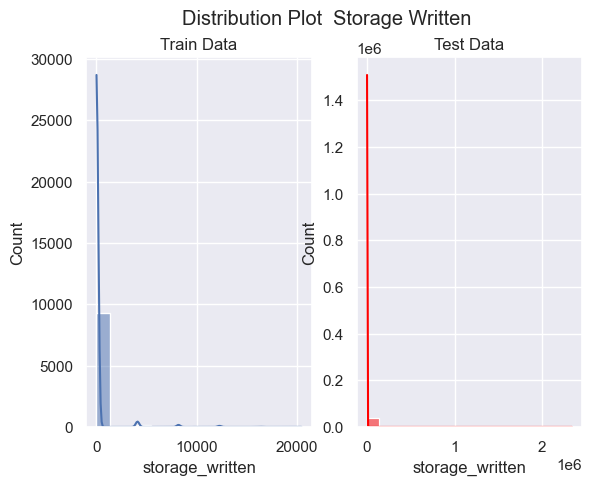

In [159]:
fig, axes = plt.subplots(1,2)
sns.set()
fig.suptitle('Distribution Plot  Storage Written')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
sns.histplot(train['storage_written'],  kde=True, ax=axes[0])# left skewed
sns.histplot(test['storage_written'], kde=True, ax=axes[1], color='red') # left skewed
plt.show()

<AxesSubplot:title={'center':'Scatterplot Storage read and Storage written'}, xlabel='timestamp', ylabel='storage_read'>

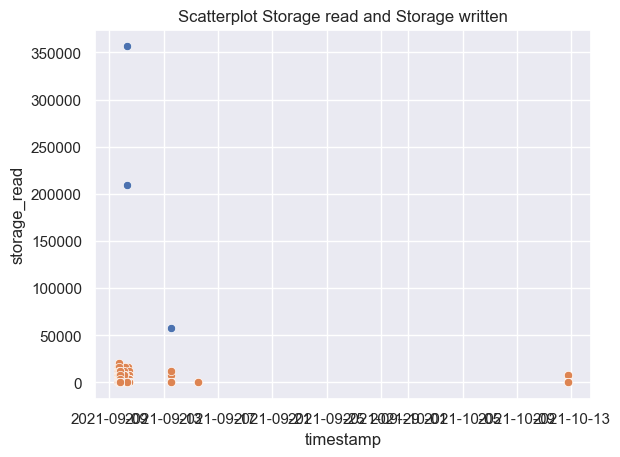

In [160]:
plt.title("Scatterplot Storage read and Storage written")
sns.scatterplot(train.storage_read)
sns.scatterplot(train.storage_written)

<AxesSubplot:title={'center':'Scatterplot Storage read and Storage written'}, xlabel='timestamp', ylabel='storage_read'>

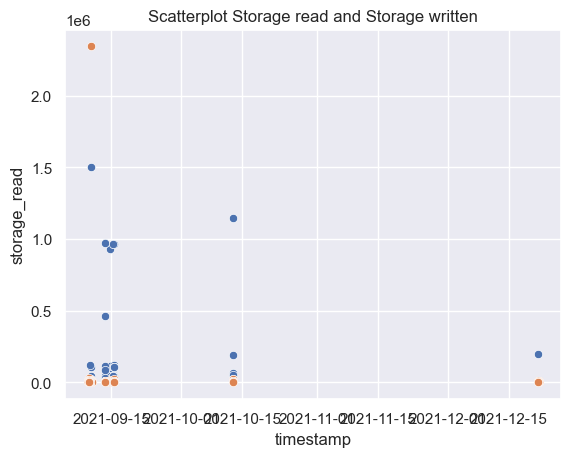

In [161]:
plt.title("Scatterplot Storage read and Storage written")
sns.scatterplot(test.storage_read)
sns.scatterplot(test.storage_written)

<AxesSubplot:>

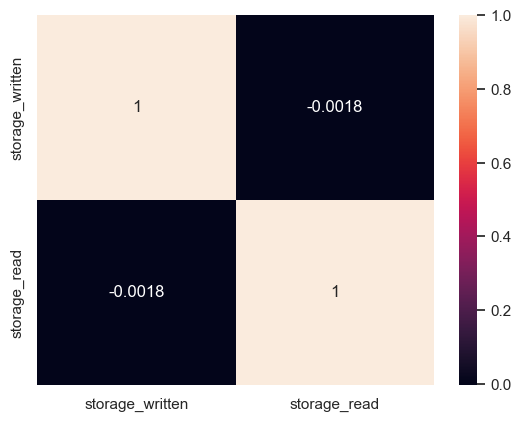

In [162]:
corr = train[['storage_written','storage_read']].corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

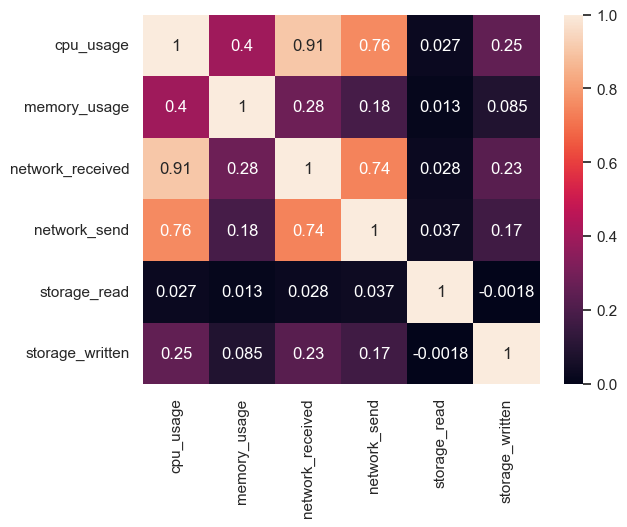

In [163]:
# Correlation of all features -> Scaling after does not make a difference
sns.heatmap(train.corr(), annot=True)

## Time Series Data 

In [190]:
# No attacks in train data only in test data
container_names = train["container_name"].unique().tolist()
# choose random container at first to get a sense of the time series data
abundant_buck_7911 = train[train["container_name"]=='abundant_buck_7911']

In [193]:
# calculate timedelta
abundant_buck_7911['tvalue'] = abundant_buck_7911.index
abundant_buck_7911['tdelta'] = (abundant_buck_7911['tvalue']-abundant_buck_7911['tvalue'].shift())

/var/folders/w0/j_glm66x74z4bc3n2z6xd92r0000gn/T/ipykernel_18014/119753912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abundant_buck_7911['tvalue'] = abundant_buck_7911.index
/var/folders/w0/j_glm66x74z4bc3n2z6xd92r0000gn/T/ipykernel_18014/119753912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abundant_buck_7911['tdelta'] = (abundant_buck_7911['tvalue']-abundant_buck_7911['tvalue'].shift())


In [201]:
abundant_buck_7911.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,container_name,dates,times,tvalue,tdelta
timestamp,,,,,,,,,,,
2021-09-09 23:21:47.309,0.111557,17649664,7532,18490,0,0,abundant_buck_7911,2021-09-09,23:21:47.309000,2021-09-09 23:21:47.309,NaT
2021-09-09 23:21:48.319,0.123430,19746816,5158,11520,0,0,abundant_buck_7911,2021-09-09,23:21:48.319000,2021-09-09 23:21:48.319,0 days 00:00:01.010000
2021-09-09 23:21:49.336,0.121031,21782528,2818,11246,0,0,abundant_buck_7911,2021-09-09,23:21:49.336000,2021-09-09 23:21:49.336,0 days 00:00:01.017000
2021-09-09 23:21:50.345,0.145855,25518080,4402,13775,0,0,abundant_buck_7911,2021-09-09,23:21:50.345000,2021-09-09 23:21:50.345,0 days 00:00:01.009000
2021-09-09 23:21:51.364,0.343448,32534528,9146,36294,0,0,abundant_buck_7911,2021-09-09,23:21:51.364000,2021-09-09 23:21:51.364,0 days 00:00:01.019000


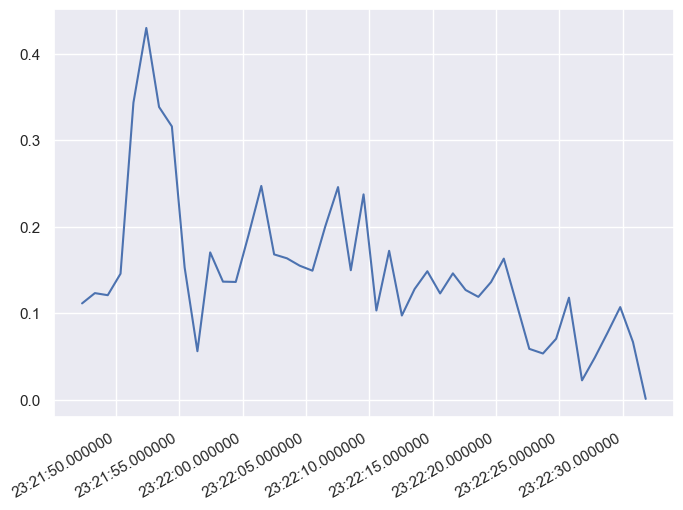

In [207]:
fig, ax = plt.subplots(figsize=(8,6))
xfmt = mdates.DateFormatter("%H:%M:%S.%f")
ax.xaxis.set_major_formatter(xfmt)
# automatically rotates the tick labels
fig.autofmt_xdate()
ax.plot(abundant_buck_7911['tvalue'], abundant_buck_7911['cpu_usage'])
plt.show()